Prediksi Kelulusan Mahasiswa Menggunakan Naive Bayes

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('dataset_kelulusan.csv')  
df.columns = df.columns.str.strip()
df.head(25)

,IPK,Kehadiran,Lama_Studi,Lulus
0,3.6,92,4,1
1,2.7,80,6,0
2,3.1,85,4,1
3,3.8,97,3,1
4,2.4,70,6,0
5,3.2,90,4,1
6,3.0,88,4,1
7,2.6,75,6,0
8,2.9,78,5,0
9,3.5,95,4,1


In [3]:
# Cek missing value
df.isnull().sum()

# Pisahkan fitur dan label
X = df.drop('Lulus', axis=1)
y = df['Lulus']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))


Naive Bayes Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [5]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree (Entropy) Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))


Decision Tree (Entropy) Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



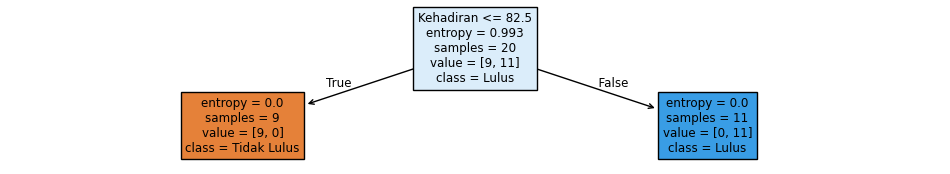

In [11]:
plt.figure(figsize=(12,2))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=["Tidak Lulus", "Lulus"], filled=True)
plt.show()


In [7]:
# Info gain menggunakan 'entropy'
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)

# Gini index
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train, y_train)

print("Info Gain (Entropy):", accuracy_score(y_test, dt_entropy.predict(X_test)))
print("Gini Index:", accuracy_score(y_test, dt_gini.predict(X_test)))


Info Gain (Entropy): 1.0
Gini Index: 1.0


In [8]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [9]:
print("=== Ringkasan Akurasi ===")
print("Naive Bayes :", accuracy_score(y_test, nb_preds))
print("Decision Tree:", accuracy_score(y_test, dt_preds))
print("SVM :", accuracy_score(y_test, svm_preds))


=== Ringkasan Akurasi ===
Naive Bayes : 1.0
Decision Tree: 1.0
SVM : 1.0
